# **Data Preprocessing and EDA**

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\KIRPAL SINGH\Desktop\Projects\New folder\data.csv")

In [4]:
df.head()

,Unnamed: 0,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Nitrate,Phosphate,Chlorophyll
0,0,7.645517,0.102493,20.795411,7.000775,-0.321561,0.505255,0.578780,-3.109832,0.002862,-0.002862
1,1,8.272600,0.114967,20.852093,6.991999,-0.321174,0.520327,0.581242,-3.113579,0.074181,-0.074181
2,2,5.129700,0.085208,20.826078,6.736983,-0.327032,0.506336,0.563338,-3.057808,0.004929,-0.004929
3,3,-1.173350,0.114869,20.800110,6.755765,-0.292665,0.507154,0.582198,-3.416870,0.058549,-0.058549
4,4,3.570700,0.093750,20.877077,7.930263,-0.113924,0.504001,0.564240,-8.777778,-0.026877,0.026877


**EDA**

In [5]:
df.shape

(15295, 11)

In [6]:
df.describe()

,Unnamed: 0,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Nitrate,Phosphate,Chlorophyll
count,15295.000000,15295.000000,15295.000000,15295.000000,15295.000000,15295.000000,15295.000000,15295.000000,15295.000000,15295.000000,15295.000000
mean,7647.000000,8.052506,0.126360,19.967394,7.005444,-0.282663,0.453031,0.512523,-4.326267,-0.006943,0.006943
std,4415.430519,2.227034,0.070153,1.252590,0.511527,0.106682,0.050334,0.045566,94.331280,0.071219,0.071219
min,0.000000,-9.532800,-0.143603,16.284669,5.058567,-0.460564,0.330242,0.396246,-8087.000000,-0.400070,-0.219881
25%,3823.500000,8.164078,0.090158,18.965488,6.723362,-0.358448,0.419628,0.479979,-4.337454,-0.022080,-0.032551
50%,7647.000000,8.511350,0.130850,19.743857,6.896931,-0.326590,0.467689,0.528625,-3.048323,0.000603,-0.000603
75%,11470.500000,8.854322,0.171611,20.679646,7.124886,-0.218271,0.489853,0.546077,-2.780570,0.032551,0.022080
max,15294.000000,20.958150,0.346134,27.835189,8.230926,0.068143,0.554531,0.603472,5035.000000,0.219881,0.400070


In [7]:
df.isnull().sum()

Unnamed: 0                  0
Dissolved Oxygen            0
Salinity                    0
Temperature                 0
pH                          0
Turbidity                   0
Dissolved Organic Matter    0
Suspended Matter            0
Nitrate                     0
Phosphate                   0
Chlorophyll                 0
dtype: int64

• There are no null values in the dataset

In [8]:
df.dtypes

Unnamed: 0                    int64
Dissolved Oxygen            float64
Salinity                    float64
Temperature                 float64
pH                          float64
Turbidity                   float64
Dissolved Organic Matter    float64
Suspended Matter            float64
Nitrate                     float64
Phosphate                   float64
Chlorophyll                 float64
dtype: object

In [9]:
df = df.drop(['Unnamed: 0'],axis=1)

• Dropping the Unnamed: 0 column as it only indicates the row id of the dataset

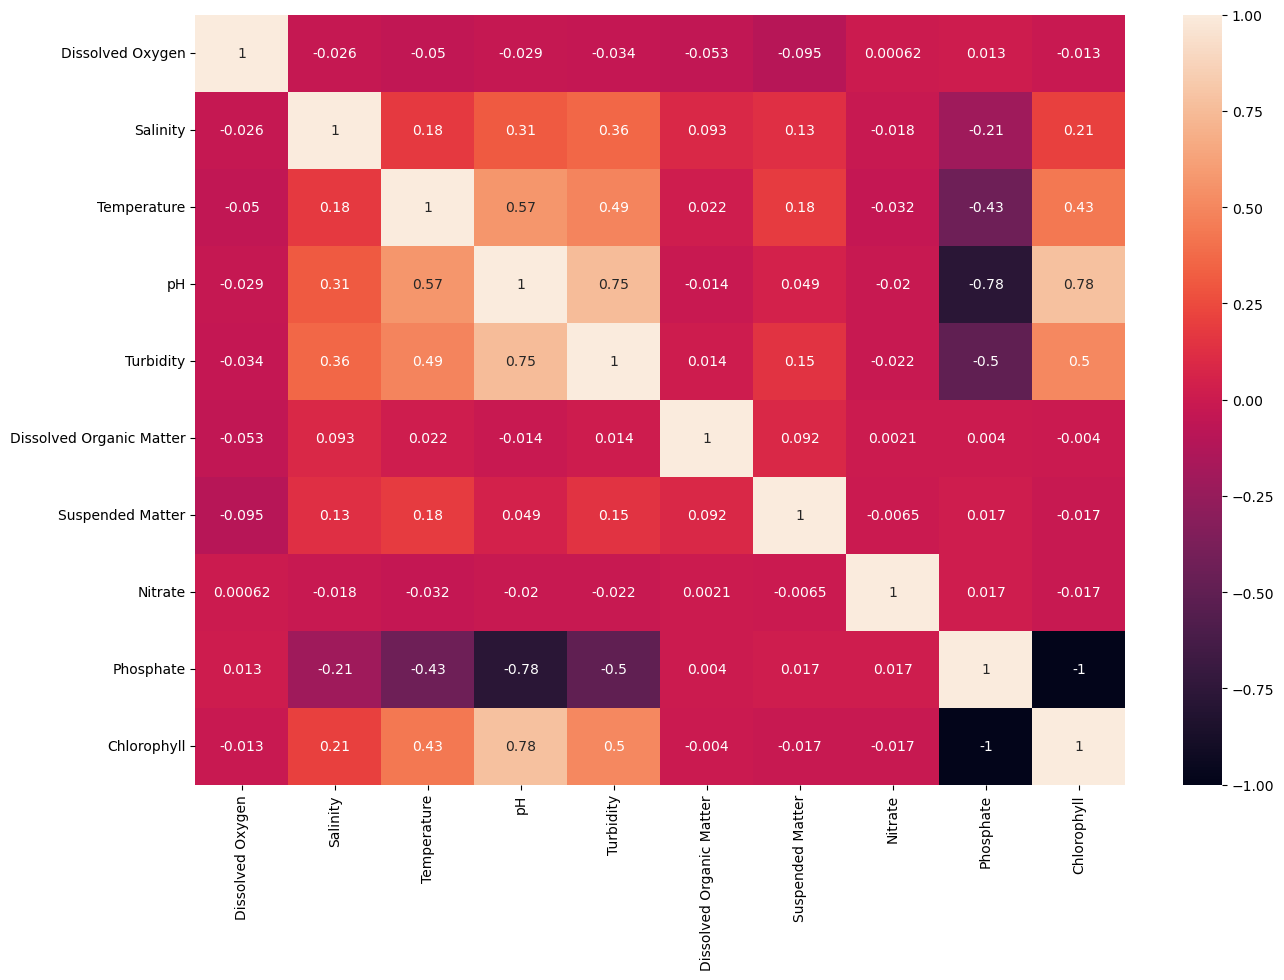

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr() , annot=True)
plt.show()

• Looking at the correlation heatmap for the dataset we can infer that there are multicollinearity upto some extend in the dataset between the features :-

1. pH and Chlorophyll - 0.78
2. pH and Phosphate - -0.78
3. Chlorophyll and Phosphate - -1 (perfect correlation)
4. pH and Turbidity - 0.75

The reason for the perfect correlation between the Chlorophyll and the Phosphate is that if we increase the phosphate in the water then there will be higher level of algae in the water as phosphate is the main nutrient for their DNA.

In [11]:
df = df.drop(["Phosphate"],axis=1)

So we are dropping the phosphate feature due to the perfect correlation with the chlorophyll feature

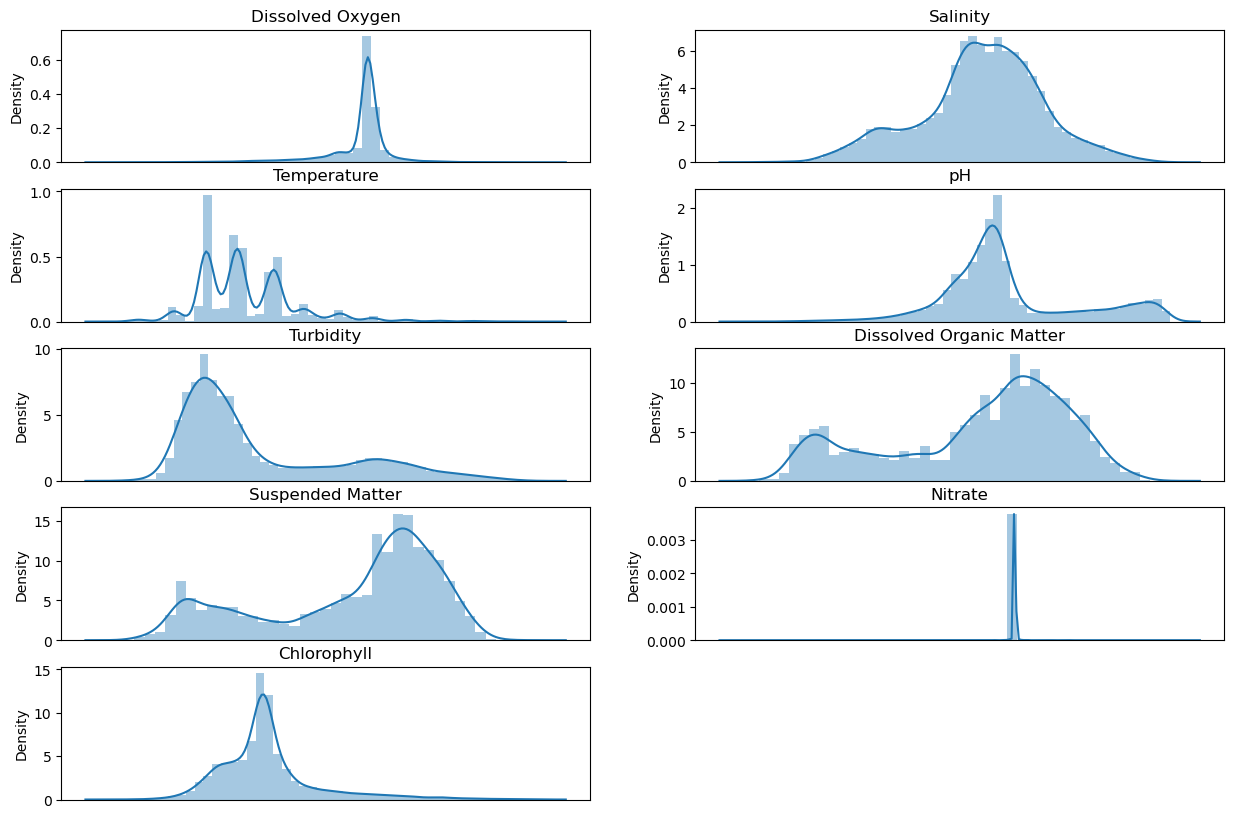

In [12]:
plt.figure(figsize=(15,10))
for idx,col in enumerate(df.columns):
    plt.subplot(5,2,idx+1)
    plt.xticks([])
    plt.title(f"{col}")
    sns.distplot(df[col])

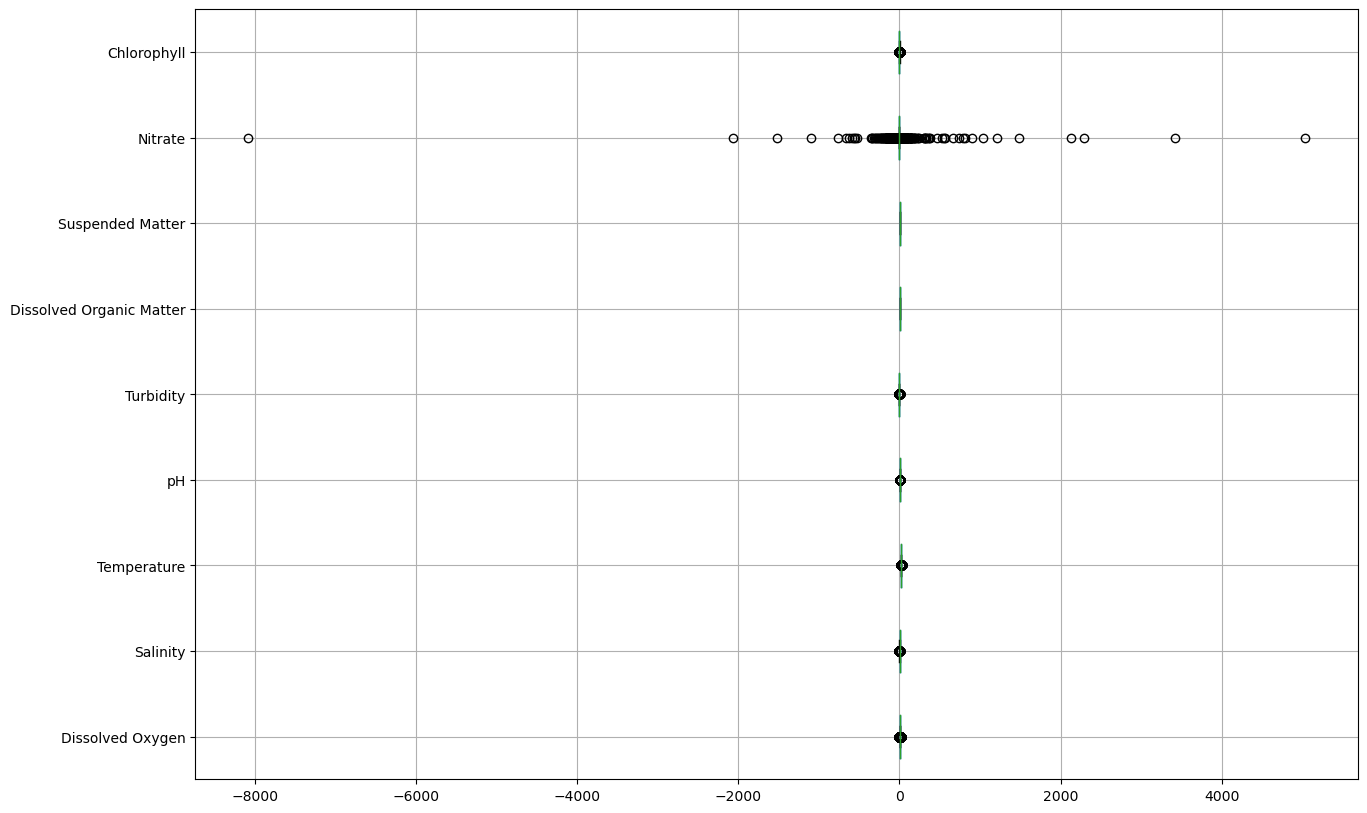

In [13]:
plt.figure(figsize=(15,10))
df.boxplot(vert=False)
plt.show()

We can see that the nitrate feature has the many outliers but the outliers are not random as it can be infered as when new factories emerged in the areas near the lake then maybe the nitrate content increased in the lake adn it also maybe due to the acid rain due to which the nitrate content may be increased.

**Assigning the labels**

In [14]:
df["label"] = 0

In [15]:
for i in range(df.shape[0]):
    oxygen = df['Dissolved Oxygen'][i]
    saline = df['Salinity'][i]
    temp = df['Temperature'][i]
    ph = df['pH'][i]
    turbidity = df['Turbidity'][i]
    org_matter = df['Dissolved Organic Matter'][i]
    susp_matter = df['Suspended Matter'][i]
    nitrate = df['Nitrate'][i]
    chlorophyll = df["Chlorophyll"][i]

    if(ph>6.5 and ph<8.5 and saline>1 and turbidity>-0.2 and turbidity<0 and temp>15 
    and temp<35 and chlorophyll>-0.1 and chlorophyll<0.1 and susp_matter>300 and susp_matter<600 and org_matter<500
    and oxygen>6.5 and nitrate<0.3):
        df["label"][i] = 0
    if((ph>4 and ph<6.5 and ph>8.5 and ph<11) or (saline>0 and saline<1) or (turbidity>0 and turbidity<0.2) or 
    (temp<15 
    and temp>25) or (chlorophyll>0.1 and chlorophyll<0.5) or (susp_matter>600 and susp_matter<900) or (org_matter>500
    and org_matter<2000) or (oxygen>4 and oxygen<6.5) or (nitrate>0.3 and nitrate<1.5)):
        df["label"][i] = 1
    else:
        df["label"][i] = 2

In [16]:
df["label"].value_counts()

1    14536
2      759
Name: label, dtype: int64

We are labelling according to if the label is 0 means water is fit for drinking , 1 means it needs treatment and 2 means it's quality if bad and is not fit for drinking.

**Scaling the Data**

In [17]:
std_scaler = StandardScaler()
scaled = std_scaler.fit_transform(df.iloc[:,:9])

In [18]:
scaled_df = pd.DataFrame(scaled , columns = df.columns[:9])

In [19]:
scaled_df = pd.concat([scaled_df,df["label"]],axis=1)

In [20]:
scaled_df.head()

,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Nitrate,Chlorophyll,label
0,-0.182755,-0.340219,0.661065,-0.009127,-0.364630,1.037587,1.454121,0.012896,-0.137686,1
1,0.098832,-0.162399,0.706319,-0.026285,-0.361003,1.337050,1.508155,0.012856,-1.139119,1
2,-1.312464,-0.586621,0.685549,-0.524840,-0.415914,1.059073,1.115223,0.013447,-0.166706,1
3,-4.142801,-0.163807,0.664817,-0.488121,-0.093766,1.075328,1.529143,0.009641,-0.919622,1
4,-2.012521,-0.464856,0.726265,1.808017,1.581754,1.012688,1.135012,-0.047192,0.279901,1


In [21]:
scaled_df.to_csv(r"C:\Users\KIRPAL SINGH\Desktop\Projects\New folder/preprocessed_data.csv")